In [0]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print((X_train.shape,y_train.shape),(X_test.shape,y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


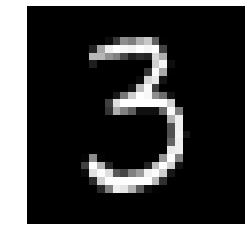

In [0]:
plt.imshow(X_train[50],cmap='gray')
plt.axis('off');

In [0]:
y_train[50]

3

In [0]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

In [0]:
from sklearn import svm

In [0]:
clf = svm.SVC(kernel='poly',degree=2,gamma='auto')
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
train_error = np.sum(train_predictions != y_train)/len(y_train)
test_error = np.sum(test_predictions != y_test)/len(y_test)
print('Training error is {}'.format(train_error))
print('Test error is {}'.format(test_error))

Training error is 0.0
Test error is 0.0194


In [0]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')
X_train /= 255.
X_test /= 255.

In [8]:
clf2 = svm.SVC(kernel='poly',degree=2,gamma='auto')
clf2.fit(X_train, y_train)
train2_predictions = clf2.predict(X_train)
test2_predictions = clf2.predict(X_test)
train2_error = np.sum(train2_predictions != y_train)/len(y_train)
test2_error = np.sum(test2_predictions != y_test)/len(y_test)
print('Training error is {}'.format(train2_error))
print('Test error is {}'.format(test2_error))

Training error is 0.08998333333333333
Test error is 0.086


Interestingly the accuracy drops (error increases) after scaling

###Now let's try the Neural Network and see if we can get better performance

In [0]:
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model_nn = Sequential()
model_nn.add(Dense(512,activation='relu',input_shape=(784,)))
model_nn.add(Dense(512,activation='relu'))
model_nn.add(Dense(10,activation='softmax'))
model_nn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_nn.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
print(784*512 + 512) # num_params = input_nodes*layer1_nodes + bias_params
print(512*512 + 512) # num_params = layer1_nodes*layer2_nodes + bias_params
print(512*10 + 10) # num_params = layer2_nodes*ouput_nodes + bias_params

401920
262656
5130


In [0]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [0]:
history_nn = model_nn.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1809 - acc: 0.9451 - val_loss: 0.0928 - val_acc: 0.9698
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0787 - acc: 0.9761 - val_loss: 0.0858 - val_acc: 0.9738
Epoch 3/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0553 - acc: 0.9825 - val_loss: 0.0760 - val_acc: 0.9777
Epoch 4/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0429 - acc: 0.9859 - val_loss: 0.0841 - val_acc: 0.9766
Epoch 5/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0356 - acc: 0.9885 - val_loss: 0.0826 - val_acc: 0.9808
Epoch 6/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0281 - acc: 0.9910 - val_loss: 0.1147 - val_acc: 0.9733
Epoch 7/20
60000/60000 [===

In [0]:
print("{} = {}".format(model_nn.metrics_names,model_nn.evaluate(X_test,y_test)))

10000/10000 [==============================] - 0s 35us/step
['loss', 'acc'] = [0.1439499208655775, 0.9802]


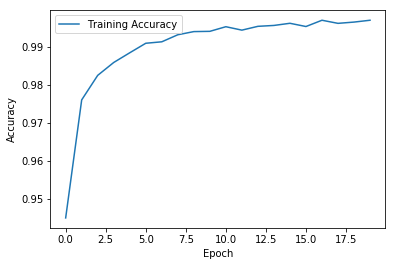

In [0]:
plt.plot(history_nn.history['acc'],label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

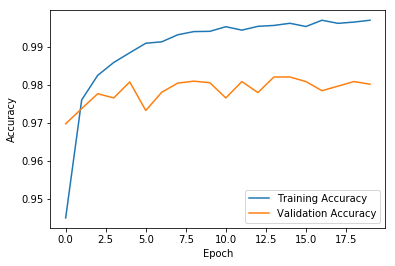

In [0]:
plt.plot(history_nn.history['acc'],label='Training Accuracy')
plt.plot(history_nn.history['val_acc'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

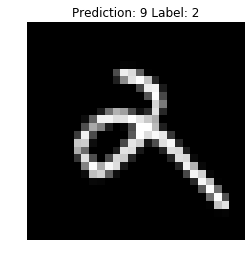

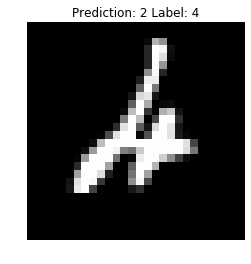

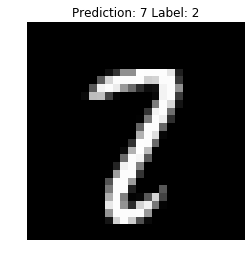

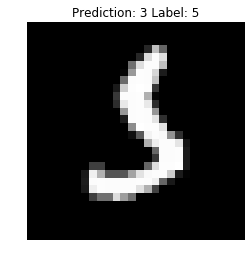

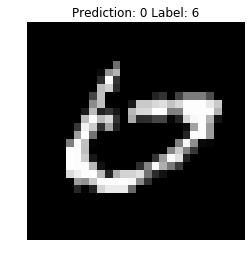

In [0]:
# Plot first 5 wrong predictions
x,i = 0,0
j = True
while j:
    test_image = X_test[x,:].reshape(1,784)
    predicted_cat = model_nn.predict(test_image).argmax()
    label = y_test[x].argmax()
    x+=1
    if (predicted_cat != label):
        i+=1
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray'))
        plt.axis('off')
        plt.show()
        if i == 5:
          j = False

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(5,5),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
#cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, kernel_size=(5,5),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_5 (Dense)              (None, 10)              

In [0]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 302us/step - loss: 0.0926 - acc: 0.9709 - val_loss: 0.0330 - val_acc: 0.9897
Epoch 2/20
60000/60000 [==============================] - 16s 266us/step - loss: 0.0356 - acc: 0.9890 - val_loss: 0.0202 - val_acc: 0.9934
Epoch 3/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.0234 - acc: 0.9926 - val_loss: 0.0162 - val_acc: 0.9946
Epoch 4/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.0201 - acc: 0.9936 - val_loss: 0.0109 - val_acc: 0.9965
Epoch 5/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.0134 - acc: 0.9960 - val_loss: 0.0107 - val_acc: 0.9967
Epoch 6/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.0131 - acc: 0.9961 - val_loss: 0.0100 - val_acc: 0.9973
Epoch 7/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.0102 - acc: 0.9969 - val_loss: 0.

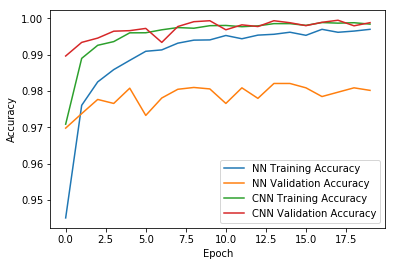

In [0]:
plt.plot(history_nn.history['acc'],label='NN Training Accuracy')
plt.plot(history_nn.history['val_acc'],label='NN Validation Accuracy')
plt.plot(history_cnn.history['acc'],label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_acc'],label='CNN Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

In [0]:
print("{} = {}".format(cnn.metrics_names,cnn.evaluate(X_test,y_test)))

10000/10000 [==============================] - 1s 69us/step
['loss', 'acc'] = [0.055503791714786914, 0.992]


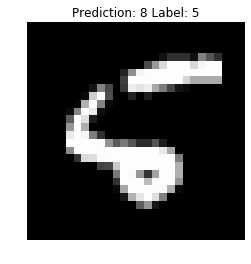

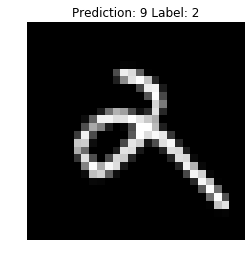

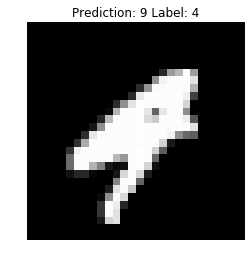

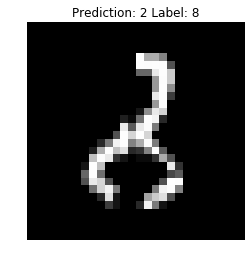

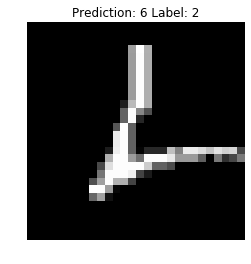

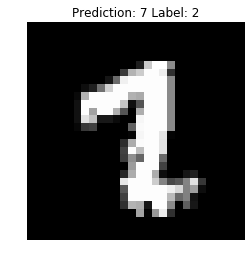

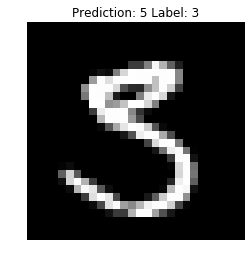

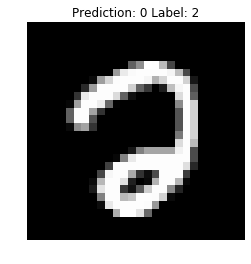

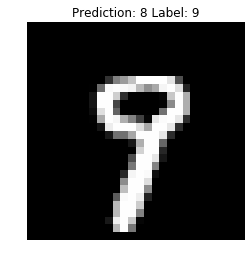

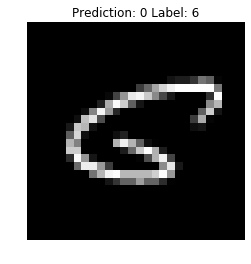

In [0]:
# Plot first 5 wrong predictions
x,i = 0,0
j = True
while j:
    test_image = X_test[x,:].reshape(1,28,28,1)
    predicted_cat = cnn.predict(test_image).argmax()
    label = y_test[x].argmax()
    x+=1
    if (predicted_cat != label):
        i+=1
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray'))
        plt.axis('off')
        plt.show()
        if i == 10:
          j = False